# Task 1

Proportion of the peel compared to the fruit in an n-dimensional
orange.

Out 1% of the radius is peel. Calculate the volume ratio between peel
and fruit for the following dimensions 2, 3, 5, 10, 170.

How does a 1-dimensional orange looks like? The diameter of the orange is 8 cm.

### Bonus:

calculate the proportion for dimensions 300, 4096 as well.

For these larger numbers you get an overflow error with the standard gamma function and need to reformulate the problem in log-space, i. e. taking the logarithm of everything and use the lgamma function.


In [2]:
from math import pi, gamma

- "Volume" of the peel (full organe - fruit): $$\pi \cdot r ^ 2 - \pi \cdot (0.99 \cdot r) ^ 2$$
- "Volume" of the fruit: $$pi \cdot (0.99 \cdot r) ^2$$
- Ratio fruit / peel: $$\frac{\pi \cdot (0.99 \cdot r) ^ 2}{(\pi \cdot r ^2 - \pi \cdot (0.99 \cdot r) ^ 2)}$$
- Proportion of fruit: $$\frac{pi \cdot (0.99 \cdot r) ^2} {\pi \cdot r ^2}$$


In [9]:
# r = 4cm
rr = 4.0

print(
    f"factor fruit / peel: {pi * (0.99 * rr) ** 2 / (pi * rr ** 2 - pi * (0.99 * rr) ** 2)}")

factor fruit / peel: 49.25125628140702


In [8]:
print(f"proportion of fruit: {pi * (0.99 * rr) ** 2 / (pi * rr ** 2)}")

proportion of fruit 0.9801


for three dimensions the formula is of the volume of a sphere is:
$$4/3 \pi r ^ 3$$

the general formula for $n§-dimensions is given by:
$$V_n(r) = \frac{\pi^{\frac{n}{2}} \cdot r^n}{\Gamma(\frac{n}{2} + 1)}$$

Where $\Gamma$ is given by $$\Gamma(n) = (n-1)!$$


In [12]:
def volume_orange(rr, *, dimension=3):
    """Calculate the volume of a ball."""
    return pi ** (dimension / 2) / gamma(dimension / 2 + 1) * rr ** dimension


# The ratio now is:
print(
    f"factor fruit / peel: {volume_orange(0.99 * rr, dimension=2) / (volume_orange(rr, dimension=2) - volume_orange(0.99 * rr, dimension=2))}")

# The proportion of fruit is:
print(
    f"proportion of fruit: {volume_orange(0.99 * rr, dimension=2) / volume_orange(rr, dimension=2)}")

factor fruit / peel: 49.25125628140702
proportion of fruit: 0.9801


## Plotting the propotion of fruit against the dimension


In [13]:
dimensions = (2, 3, 5, 10, 170)
proportions = [volume_orange(0.99*rr, dimension=dd) / volume_orange(rr, dimension=dd)
               for dd in dimensions]

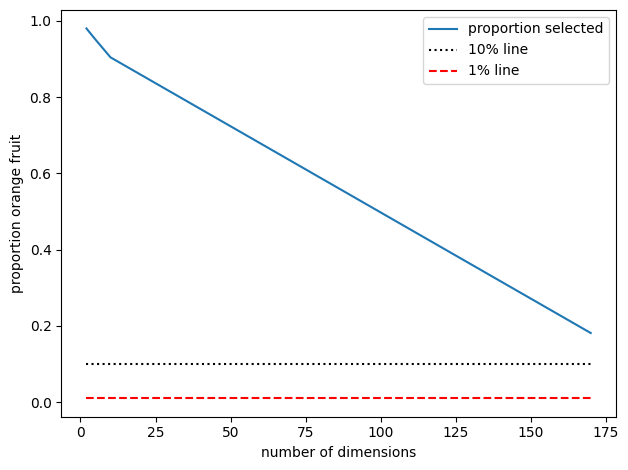

In [17]:
from matplotlib import pyplot as plt

plt.plot(dimensions, proportions, label="proportion selected")
plt.plot((2, 170), (0.1, 0.1), "k:", label="10% line")
plt.plot((2, 170), (0.01, 0.01), "r--", label="1% line")
plt.legend()
plt.xlabel('number of dimensions')
plt.ylabel('proportion orange fruit')
plt.tight_layout()
plt.show()

In [20]:
# BONUS
dimensions = (2, 3, 5, 10, 170, 300, 4096)
try:
    proportions = [volume_orange(0.99 * rr, dimension=dd) / volume_orange(rr, dimension=dd)
                   for dd in dimensions]
except OverflowError:
    print("it overflowed, what a surprise!")
# Overflow error for 300

it overflowed, what a surprise!


In [23]:
from math import log, lgamma, exp


def ln_volume_orange(radius: int | float, dimension: int) -> float:
    """Calculate the volume of a sphere using the log gamma function to avoid large numbers from the factorial"""
    return (dimension / 2) * lgamma(pi) - lgamma(dimension / 2 + 1) + dimension * lgamma(rr)


proportions = [ln_volume_orange(
    (0.99 * rr), dd) / ln_volume_orange(rr, dd) for dd in dimensions]

# Task 2

Watch this [video](https://www.youtube.com/watch?v=iH2kATv49rc) (preferably with 2x speed)

Random walks in 2D and 3D are fundamentally different (Markov chains approach)

# Task 3

Learn a 
- linear mapping
- LSTM mapping
- Transformer 
  
for 
- data0.npz
- data1.npz
- data2.npz 

Which model has the lowest training loss after training?

In [26]:
import numpy as np
import torch

npz_files = np.load('data0.npz')
print(npz_files.files)
xx0s = npz_files['xx0s']
yy0s = npz_files['yy0s']

['xx0s', 'yy0s']


In [27]:
class LinearModel(torch.nn.Module):
    """
    This is a sample classe for SWR2.
    """

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_mapping = torch.nn.Linear(input_size, output_size)
        
    def forward(self, input_, *args):
        output = self.linear_mapping(input_)
        return output

In [28]:
class LSTMModel(torch.nn.Module):
    """
    This is a sample classe for SWR2.
    """

    def __init__(self, input_size, output_size):
        super().__init__()
        self.lstm_layer = torch.nn.LSTM(input_size, hidden_size=16)
        self.linear = torch.nn.Linear(16, output_size)
        
    def forward(self, input_, *args):
        output, (h_n, c_n) = self.lstm_layer(input_)
        output = self.linear(output)
        return output

In [29]:
class TransformerModel(torch.nn.Module):
    """
    This is a sample classe for SWR2.
    """

    def __init__(self, input_size, output_size):
        super().__init__()
        encoder_layer = torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=1, dim_feedforward=64)
        self.encoder = torch.nn.TransformerEncoder(encoder_layer, num_layers=1)
        self.linear = torch.nn.Linear(input_size, output_size)
        
    def forward(self, input_, *args):
        output = self.encoder(input_)
        output = self.linear(output)
        return output


In [30]:
npz_files = np.load('data1.npz')
print(npz_files.files)
xx1s = npz_files['xx1s']
yy1s = npz_files['yy1s']

['xx1s', 'yy1s']


In [31]:
linear = LinearModel(2, 3)
lstm = LSTMModel(2, 3)
transformer_enc = TransformerModel(2, 3)

In [32]:
# test a single forward pass to see if the model is specified correctly
xx = torch.tensor(xx1s[0])

yy_linear = linear.forward(xx)
yy_linear.shape  # [3]

torch.Size([3])

In [33]:
# insert the batch and sequence dimension with .view
yy_lstm = lstm.forward(xx.view(1, 1, 2))
yy_lstm.shape  # [1, 1, 3]
yy_lstm = yy_lstm.view(3)  # remove the batch and sequence dimension again

In [35]:
yy_transformer = transformer_enc.forward(xx.view(1, 1, 2))
yy_transformer.shape  # [1, 1, 3]
yy_transformer = yy_transformer.view(3)  # remove the batch and sequence dimension again

In [36]:
# do the learning
learning_rate = 0.001
optimizer = torch.optim.SGD(transformer_enc.parameters(), lr=learning_rate)

for epoch in range(100):
    losses = list()
    for index in range(len(yy1s)):
        xx = torch.tensor(xx1s[index])
        yy_true = torch.tensor(yy1s[index])

        # reset gradients
        optimizer.zero_grad()

        # forward pass
        yy_transformer = transformer_enc.forward(xx.view(1, 1, 2))
        yy_transformer = yy_transformer.view(3)  # remove the batch and sequence dimension again

        # loss computation
        loss = torch.mean( (yy_true - yy_transformer) ** 2 )
        losses.append(float(loss.item()))

        # backwards pass
        loss.backward()

        # stochastic gradient decent
        optimizer.step()
    print(f"Loss after epoch {epoch} is: {np.mean(losses)}")

Loss after epoch 0 is: 27.303105365075172
Loss after epoch 1 is: 26.230148075856267
Loss after epoch 2 is: 25.396364252530038
Loss after epoch 3 is: 24.711975027797745
Loss after epoch 4 is: 24.143237713966517
Loss after epoch 5 is: 23.675843445397913
Loss after epoch 6 is: 23.299560468681157
Loss after epoch 7 is: 23.00263698419556
Loss after epoch 8 is: 22.77147804059554
Loss after epoch 9 is: 22.528834008546546
Loss after epoch 10 is: 22.32406620286405
Loss after epoch 11 is: 22.195300203077494
Loss after epoch 12 is: 22.038450114130974
Loss after epoch 13 is: 21.95159308128059
Loss after epoch 14 is: 21.914757870659233
Loss after epoch 15 is: 21.83612617507577
Loss after epoch 16 is: 21.861312572211027
Loss after epoch 17 is: 21.861376997232437
Loss after epoch 18 is: 21.741918256133793
Loss after epoch 19 is: 21.720914359092713
Loss after epoch 20 is: 21.704502793848516
Loss after epoch 21 is: 21.691543081998827
Loss after epoch 22 is: 21.717081597596408
Loss after epoch 23 is: 21